In [1]:
import cv2
import numpy as np

In [2]:
def averaging_pooling(img, kernel_shape, padding=False):
    #计算池化后图像大小
    out_width = img.shape[0] - kernel_shape + 1
    out_height = img.shape[1] - kernel_shape + 1
    out = np.zeros([out_width,out_height,3])
    if padding == True:
        '''补零'''
        img = cv2.resize(img, (out.shape[1]+kernel_shape-1, out.shape[0]+kernel_shape-1)) #这里cv2.resize函数要反一下，详情
        img = np.array(img, dtype='int')
        img[0:kernel_shape-1,:]=0
        img[:,0:kernel_shape - 1] = 0
        img[img.shape[0]-kernel_shape-2:,:] = 0
        img[:,img.shape[1] - kernel_shape - 2:] = 0
    for c in range(3):
        for i in range(img.shape[0]-kernel_shape):
            for j in range(img.shape[1]-kernel_shape):
                out[i,j,c] = np.mean(img[i:i+kernel_shape,j:j+kernel_shape,c])
    return out.astype(np.uint8)

In [3]:
img = cv2.imread(r'D:\Program Files (x86)\ImageProcessing100Wen-master\ImageProcessing100Wen-master\assets\imori.jpg')
cv2.imshow('1',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

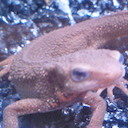

In [4]:
output = averaging_pooling(img,8, False)

In [5]:
cv2.imshow('2',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

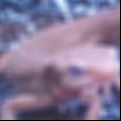

In [6]:
#补零
output = averaging_pooling(img,8, True)
cv2.imshow('3',output)
cv2.waitKey(0)
cv2.destroyAllWindows()

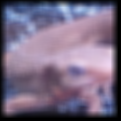